In [32]:
import pandas as pd
from tensorflow.keras.models import load_model
import tensorflow_hub as hub
import tensorflow as tf
import pathlib
import cv2


In [33]:
from string import ascii_lowercase as alc

ASL_map = {}
for i in range(0, 26):
    ASL_map[i] = alc[i]
ASL_map[26] = 'del'
ASL_map[27] = 'nothing'
ASL_map[28] = 'space'
ASL_map


{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: 'del',
 27: 'nothing',
 28: 'space'}

In [34]:
#from google.colab import drive
# drive.mount('/content/gdrive')

In [37]:
model_Efficientnet = load_model('/Users/codyyu/ASL-Alphabet-Detector/models/Efficientnet_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})


In [ ]:
model_Efficientnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Efficientnet_b0 (KerasLayer  (None, 1000)             5330564   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 Output_layer (Dense)        (None, 29)                29029     
                                                                 
Total params: 5,359,593
Trainable params: 29,029
Non-trainable params: 5,330,564
_________________________________________________________________


In [ ]:
import numpy as np
# from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

def prepare(filepath, x, y):
    image = cv2.imread(filepath)
    image = cv2.resize(image, (x, y))
   # image.reshape(-1, 224, 224, 3)
    plt.imshow(image)
    plt.show()
    image = image[np.newaxis, :,  :, :]
    return image.astype('float32')/255.0


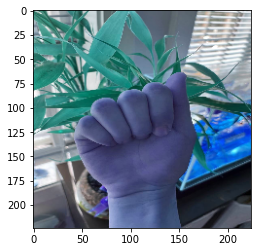

numpy.ndarray

In [ ]:
a=model_Efficientnet.predict(prepare('/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_mess.jpg'))
type(a)

In [ ]:
a

array([[1.3437210e-09, 4.0433097e-14, 3.5973572e-12, 1.7992624e-18,
        6.1387993e-08, 3.1716070e-08, 7.8416592e-01, 1.2884209e-14,
        1.6421205e-10, 8.8165913e-10, 1.8557570e-11, 7.5728437e-09,
        7.7137761e-11, 5.8371421e-07, 8.7617804e-12, 6.6789818e-17,
        3.0180761e-10, 2.8241166e-11, 2.8134645e-12, 2.1583267e-01,
        3.8707041e-11, 3.9837808e-08, 7.9554774e-12, 6.7506028e-07,
        3.7215203e-10, 2.5141254e-12, 4.3031362e-18, 2.1936205e-12,
        5.8262616e-19]], dtype=float32)

In [ ]:
def get_top_x(index, x):
  result = sorted(range(len(index[0])), key=lambda i: index[0][i])
  result.reverse()

  for i in result[:x]:
    print(ASL_map[i])
  print()
  print()

In [ ]:
# !unzip -q /content/ASL_testing_new.zip

In [ ]:
f = '/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new'
import os


In [ ]:
def pass_folder(folder, model, x, y):
  for file in os.listdir(folder):
    f = os.path.join(folder, file)
    print(f)
    get_top_x(model.predict(prepare(f, x, y)), 3)
    


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/F_test.jpg


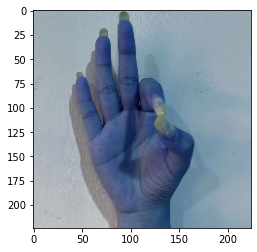

u
x
v


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/G_test.jpg


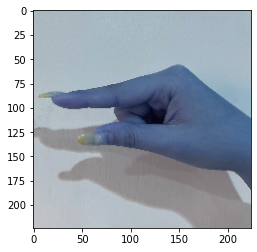

p
j
q


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/L_test.jpg


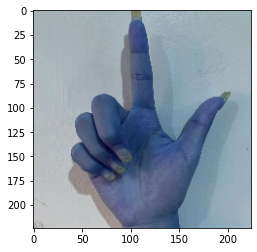

u
l
i


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/M_test.jpg


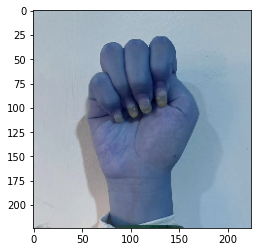

i
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/S_test.jpg


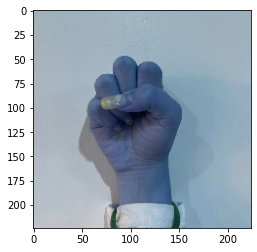

i
u
h


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/X_test.jpg


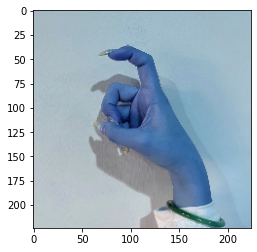

p
t
s


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Y_test.jpg


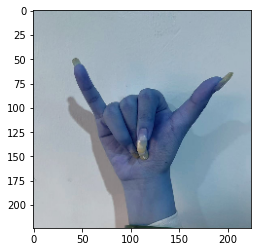

w
j
v


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_white_male.jpg


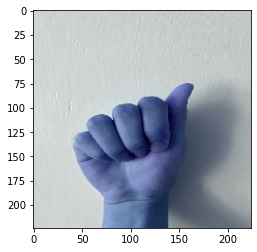

z
a
g


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/U_test.jpg


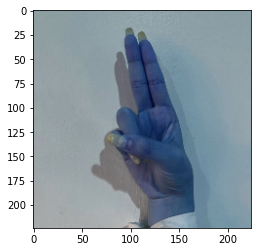

h
u
g


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/T_test.jpg


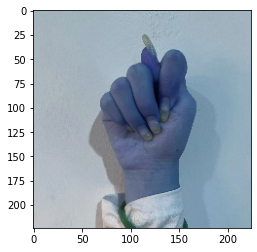

i
l
u


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_white.jpg


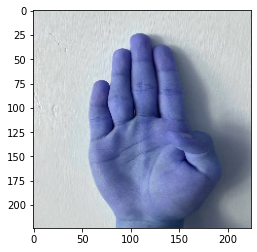

z
h
g


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/K_test.jpg


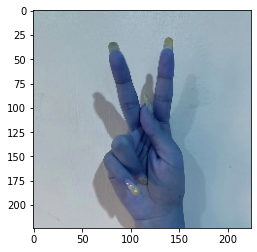

u
l
h


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/J_test.jpg


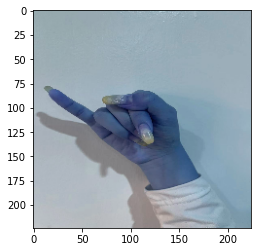

h
t
p


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Z_test.jpg


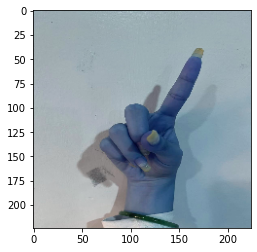

l
u
g


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_mess.jpg


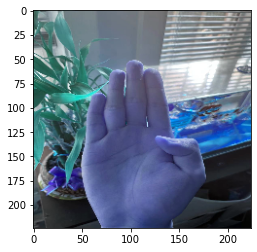

g
i
t


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Q_test.jpg


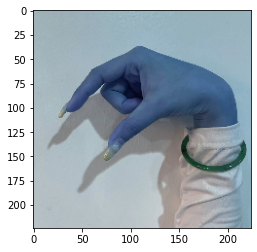

q
g
l


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/P_test.jpg


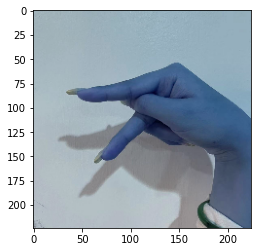

p
q
j


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/O_test.jpg


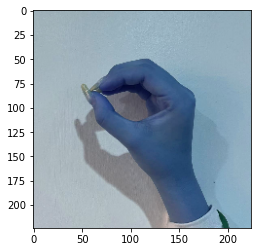

o
space
z


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/N_test.jpg


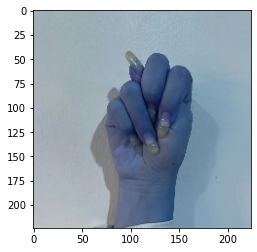

t
u
n


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_female.jpg


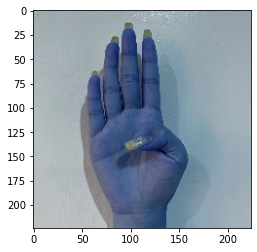

u
w
b


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/E_test.jpg


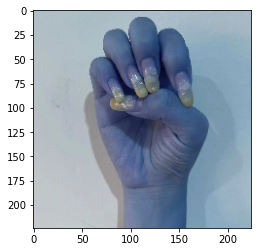

i
t
j


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/D_test.jpg


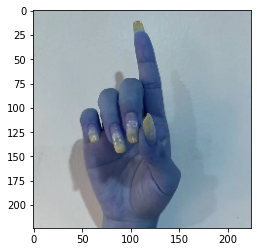

i
t
l


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_mess.jpg


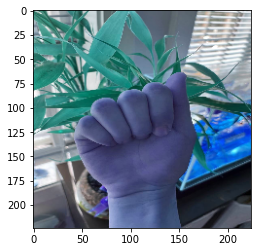

g
t
x


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/H_test.jpg


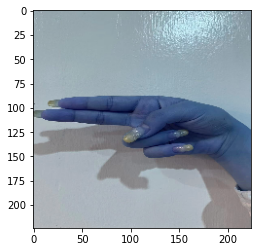

y
j
h


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/I_test.jpg


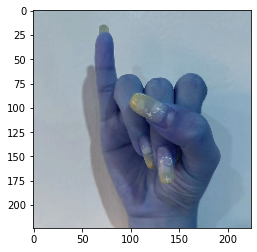

i
t
space


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/C_test.jpg


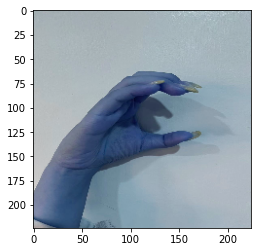

q
c
t


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_wood.jpg


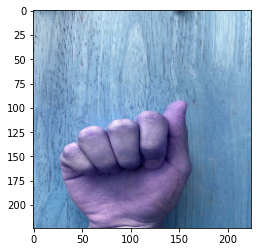

z
t
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/V_test.jpg


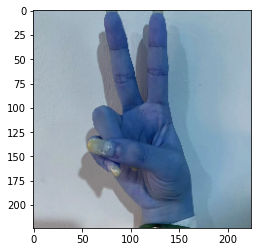

i
h
t


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/W_test.jpg


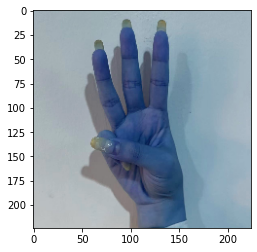

w
u
i


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_white_female.jpg


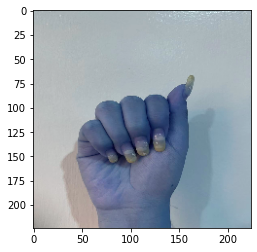

t
a
m




In [ ]:
pass_folder(f, model_Efficientnet, 224, 224)

## Mobile Net

In [ ]:
model_mobile_net = load_model('/Users/codyyu/ASL-Alphabet-Detector/models/model_mobileNetV2.h5')

/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/F_test.jpg


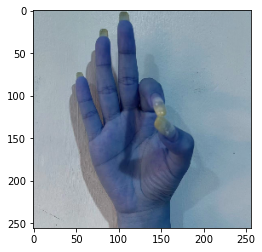

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/G_test.jpg


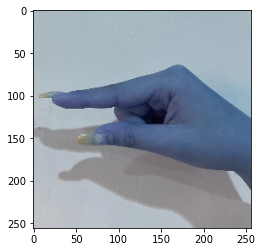

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/L_test.jpg


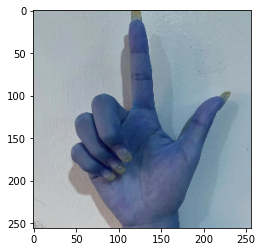

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/M_test.jpg


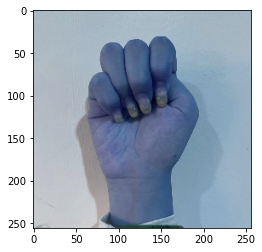

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/S_test.jpg


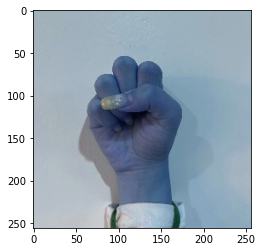

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/X_test.jpg


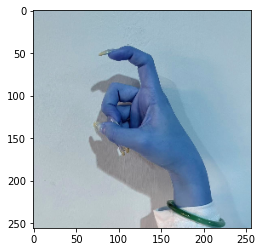

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Y_test.jpg


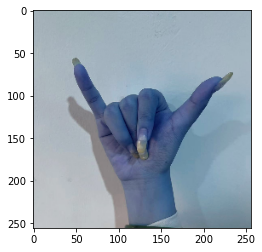

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_white_male.jpg


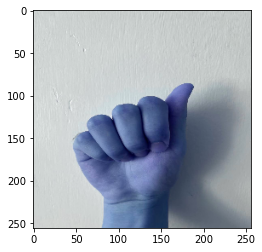

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/U_test.jpg


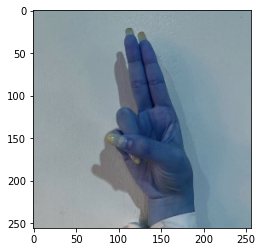

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/T_test.jpg


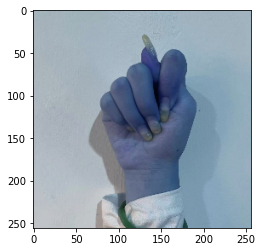

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_white.jpg


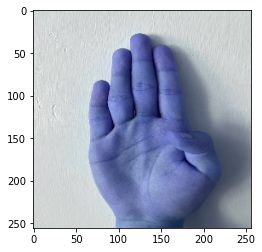

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/K_test.jpg


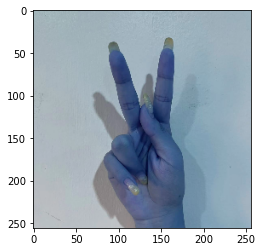

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/J_test.jpg


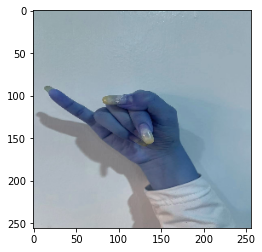

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Z_test.jpg


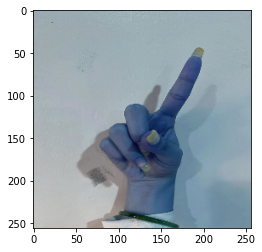

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_mess.jpg


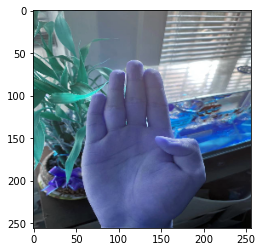

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Q_test.jpg


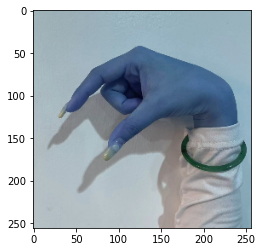

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/P_test.jpg


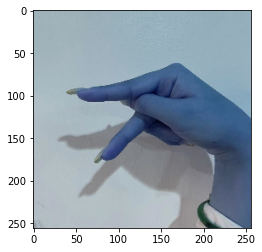

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/O_test.jpg


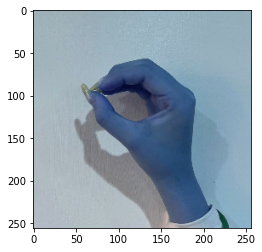

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/N_test.jpg


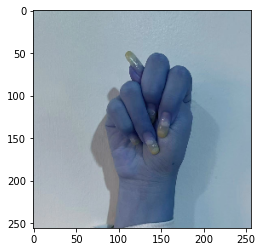

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_female.jpg


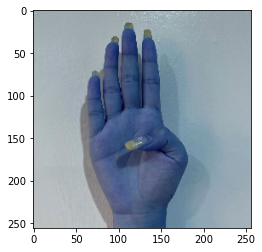

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/E_test.jpg


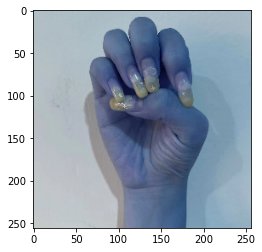

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/D_test.jpg


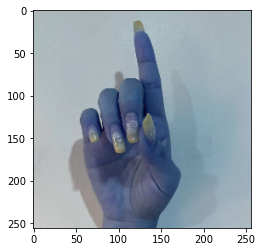

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_mess.jpg


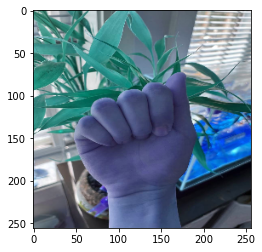

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/H_test.jpg


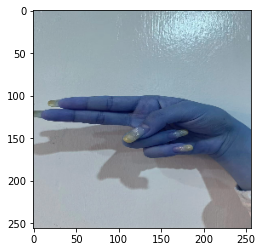

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/I_test.jpg


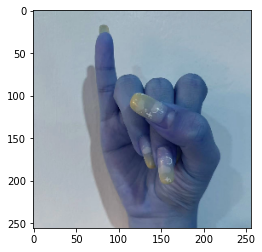

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/C_test.jpg


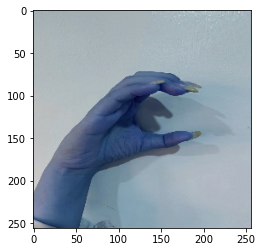

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_wood.jpg


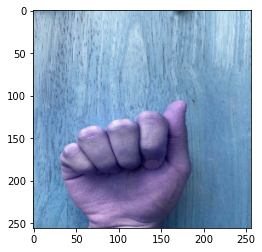

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/V_test.jpg


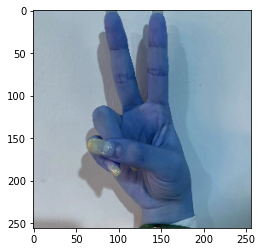

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/W_test.jpg


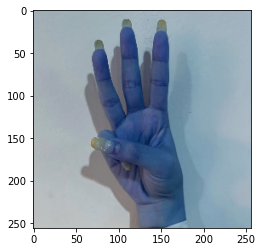

nothing
s
e


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_white_female.jpg


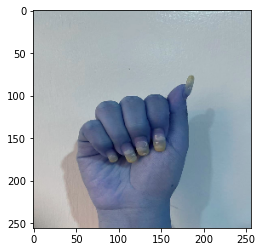

nothing
s
e




In [ ]:
pass_folder(f, model_mobile_net, 256, 256)

In [38]:
Inception_res_V2 = load_model('/Users/codyyu/Downloads/model_inceptionResNetV2.h5', custom_objects={'KerasLayer':hub.KerasLayer})

/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/F_test.jpg


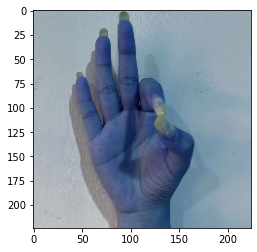

t
m
n


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/G_test.jpg


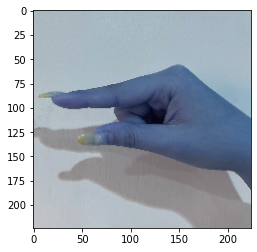

t
y
z


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/L_test.jpg


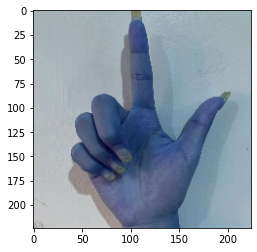

x
u
v


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/M_test.jpg


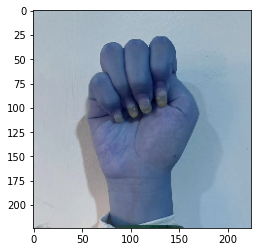

t
s
y


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/S_test.jpg


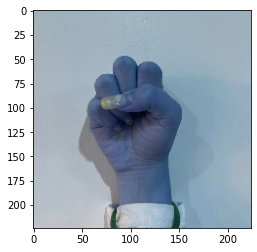

s
x
v


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/X_test.jpg


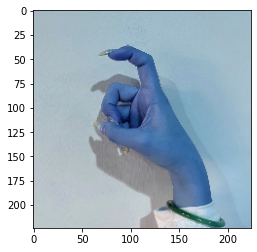

t
y
del


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Y_test.jpg


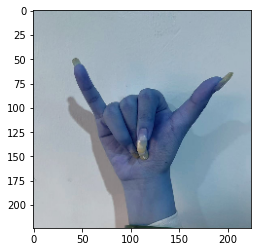

y
z
t


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_white_male.jpg


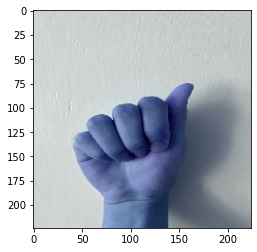

a
m
t


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/U_test.jpg


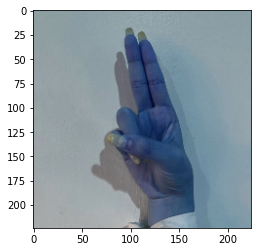

s
t
m


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/T_test.jpg


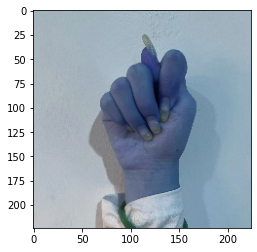

t
m
y


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_white.jpg


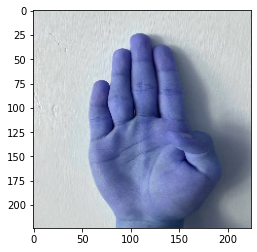

u
e
b


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/K_test.jpg


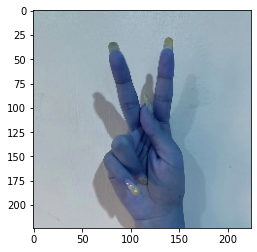

y
m
z


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/J_test.jpg


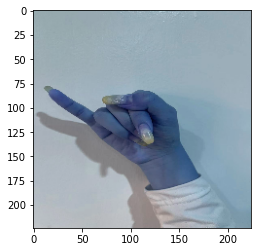

y
t
space


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Z_test.jpg


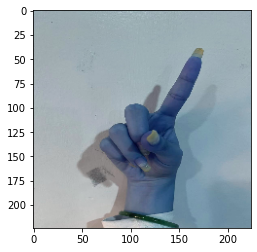

m
y
n


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_mess.jpg


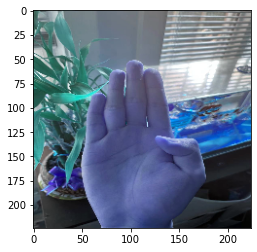

b
w
f


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/Q_test.jpg


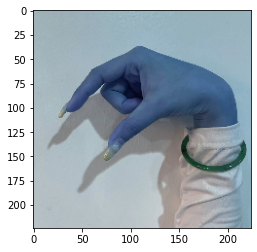

del
z
y


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/P_test.jpg


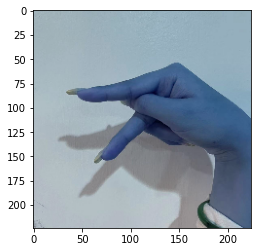

del
t
s


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/O_test.jpg


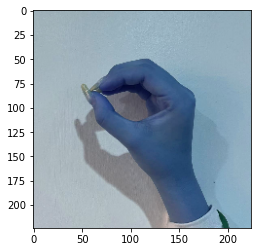

del
t
v


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/N_test.jpg


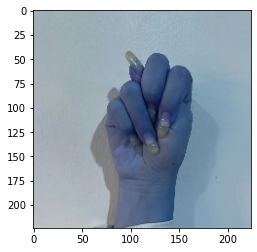

y
t
m


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/B_test_female.jpg


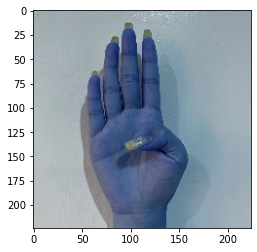

s
y
t


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/E_test.jpg


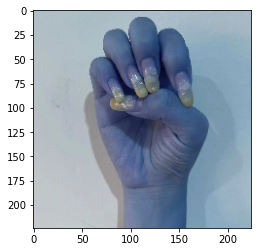

e
t
m


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/D_test.jpg


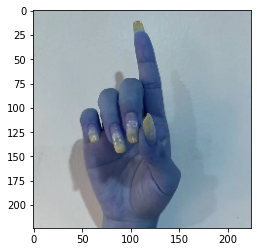

m
t
z


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_mess.jpg


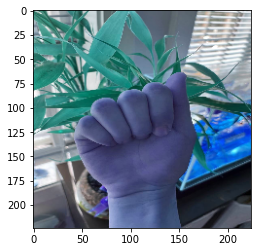

t
x
w


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/H_test.jpg


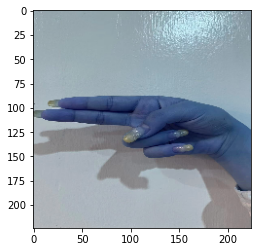

del
t
w


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/I_test.jpg


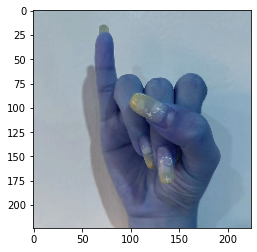

x
space
y


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/C_test.jpg


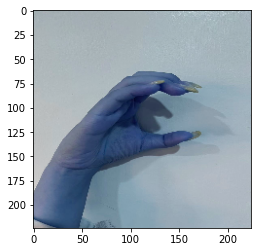

del
z
space


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_wood.jpg


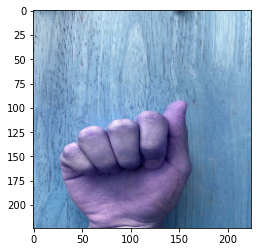

z
t
s


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/V_test.jpg


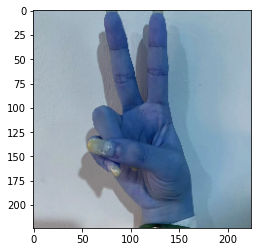

t
y
s


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/W_test.jpg


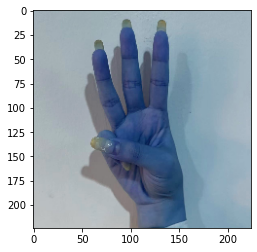

t
y
m


/Users/codyyu/ASL-Alphabet-Detector/ASL_testing_new/A_test_white_female.jpg


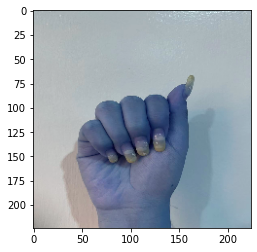

m
t
a




In [39]:
pass_folder(f, Inception_res_V2, 224, 224)